|Challenge Set       |**5 **              |
|-------------------:|:-------------------|
|Topic:              |Classification      |
|Date:               |08/01/2016          | 
|Name:               |Bryant Biggs        |
|Worked with:        |N/A                 |
---
# WRITTEN FOR PYTHON 3
### Table of Contents:
 - [**Challenge 1**](#1)
 - [**Challenge 2**](#2)
 - [**Challenge 3**](#3)
 - [**Challenge 4**](#4)
 - [**Challenge 5**](#5)
 - [**Challenge 6**](#6)
 - [**Challenge 7**](#7)
 - [**Challenge 8**](#8)
 - [**Challenge 9**](#9)
 - [**Challenge 10**](#10)
 - [**Challenge 11**](#11)
 - [**Challenge 12**](#12)
---

In [30]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import os
import urllib.request 

import pandas as pd
import numpy as np
'''
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
'''
# default plot stying changes
import seaborn as sns
sns.set_style("white")
sns.set_context("poster", font_scale=1., rc={"lines.linewidth": 2.5})
sns.set_palette("Set2")
colors = sns.color_palette('Set2',12)

In [2]:
# Data
data = 'house-votes-84.data'
names = 'house-votes-84.names'
base_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/'

files = [data, names]

# download files if they do not exist
for file in files:
    if not os.path.isfile('{0}'.format(file)):
        _ = urllib.request.urlretrieve('{0}/{1}'.format(base_url, file), '{0}'.format(file))

# <a id='1'></a>Challenge 1:
Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [3]:
columns =  ['class', 'infants', 'water', 'budget', 'freeze', 'salvador', 'relig', 'anti-sat', 'nic-aid', 
            'missile', 'immig', 'synfuels', 'educ', 'su-fund', 'crime', 'duty-free', 'africa']
df = pd.read_csv(data, sep=',', names=columns)
df = df.replace(['y', 'n'], [1, 0]) 
df.head(3)

,class,infants,water,budget,freeze,salvador,relig,anti-sat,nic-aid,missile,immig,synfuels,educ,su-fund,crime,duty-free,africa
0,republican,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
2,democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0


In [4]:
# find majority vote average and replace '?' with majority vote average (1, 0)
for col in columns[1:]:
    df_temp = df[col].value_counts().to_frame()
    ones = int(df_temp.iloc[1])
    zeros = int(df_temp.iloc[0])
    avg = int(round(ones/(ones+zeros), 0))
    df[col] = df[col].replace('?', avg)
df.head(3)

,class,infants,water,budget,freeze,salvador,relig,anti-sat,nic-aid,missile,immig,synfuels,educ,su-fund,crime,duty-free,africa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0


## Answer for Challenge 1 is:
<br>
<font color='blue'>Dataframe shown above</font>

___

# <a id='2'></a>Challenge 2:
Split the data into a test and training set. Use this function:
```
from sklearn.cross_validation import train_test_split
```

In [5]:
from sklearn.cross_validation import train_test_split

train, test = train_test_split(df, test_size = 0.30, random_state=4444)

data_cols = columns[1:]
label_cols = columns[0]

train_data = train[data_cols]
train_labels = train[label_cols]

test_data = test[data_cols]
test_labels = test[label_cols]

## Answer for Challenge 2 is:

<font color='blue'>Shown directly above (one cell up)</font><br>

___

# <a id='3'></a>Challenge 3:
Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):

```
from sklearn.neighbors import KNeighborsClassifier
```

Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k

You can use this to calculate accuracy:

```
from sklearn.metrics import accuracy_score
```

Which k value gives the highest accuracy?

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.grid_search import GridSearchCV

param_grid = {
            'n_neighbors': list(range(1, 20)),
            'weights': ['uniform', 'distance'],
            'algorithm': ['ball_tree', 'kd_tree'],
            'leaf_size' : list(range(1, 30))
            }
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid)
knn_mdl = knn_grid.fit(train_data, train_labels)

print('Best score: {0}%'.format(knn_grid.best_score_*100))
print('Best parameters set:')

best_parameters = knn_grid.best_estimator_.get_params()

for param_name in sorted(param_grid.keys()):
    print('\t{0}: {1}'.format(param_name, best_parameters[param_name]))

print(classification_report(test_labels, knn_grid.predict(test_data)))

Best score: 95.06578947368422%
Best parameters set:
	algorithm: ball_tree
	leaf_size: 13
	n_neighbors: 2
	weights: distance
             precision    recall  f1-score   support

   democrat       0.91      0.94      0.92        77
 republican       0.90      0.87      0.89        54

avg / total       0.91      0.91      0.91       131



## Answer for Challenge 3 is:
<br>
<font color='blue'>The best accuracy is when k = 2.</font>

___

# <a id='4'></a>Challenge 4:
Make a similar model but with LogisticRegression instead, calculate test accuracy.

In [7]:
from sklearn.linear_model import LogisticRegression
param_grid = {
            'penalty': ['l2'],
            'class_weight': ['balanced'],
            'solver': ['newton-cg', 'lbfgs', 'sag'],
            'multi_class': ['ovr']
            }

logr_grid = GridSearchCV(LogisticRegression(n_jobs=-1), param_grid)
logr_mdl = logr_grid.fit(train_data, train_labels)

print('Best score: {0}%'.format(logr_grid.best_score_*100))
print('Testing accuracy: {0}%'.format(accuracy_score(test_labels, knn_grid.predict(test_data))*100))
print('Best parameters set:')

best_parameters = logr_grid.best_estimator_.get_params()

for param_name in sorted(param_grid.keys()):
    print('\t{0}: {1}'.format(param_name, best_parameters[param_name]))

print(classification_report(test_labels, logr_grid.predict(test_data)))

Best score: 96.05263157894737%
Testing accuracy: 90.83969465648855%
Best parameters set:
	class_weight: balanced
	multi_class: ovr
	penalty: l2
	solver: newton-cg
             precision    recall  f1-score   support

   democrat       0.94      0.96      0.95        77
 republican       0.94      0.91      0.92        54

avg / total       0.94      0.94      0.94       131



## Answer for Challenge 4 is:

<font color='blue'>The best testing accuracy is 90.84%</font>
___

# <a id='5'></a>Challenge 5:
Make a bar graph of democrats and republicans. How many of each are there?

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

In [14]:
cnts = df['class'].value_counts().to_frame().reset_index()
cnts

,index,class
0,democrat,267
1,republican,168


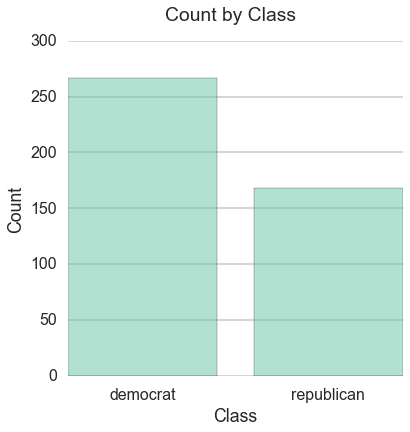

In [31]:
# make figure
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

# data
classes = cnts['index'].values.tolist()
counts = cnts['class'].values.tolist()
y_pos = np.arange(len(classes))

# chart
ax.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, classes)

# labels/titles
plt.suptitle('Count by Class')
plt.ylabel('Count')
plt.xlabel('Class')

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True)
plt.show()